In [100]:
import sympy.vector as spv

## Sympy Vector

### 1. 공간 생성

In [101]:
N = spv.CoordSys3D('A') # Create a 3D coordinate system

N

A

### 2. 3차원 벡터

In [102]:
# i, j, k are the unit vectors in the x, y, z directions
v1: spv.Vector= N.i - 2*N.j + 4*N.k
v2: spv.Vector= 3*N.i + 2*N.j - N.k

v1, v2

(A.i + (-2)*A.j + 4*A.k, 3*A.i + 2*A.j + (-1)*A.k)

In [103]:
# Type Change
v1_components = v1.to_matrix(N).tolist()
v2_components = v2.to_matrix(N).tolist()

v1_x, v1_y, v1_z = v1_components
v2_x, v2_y, v2_z = v2_components

v1_x, v1_y, v1_z, v2_x, v2_y, v2_z


([1], [-2], [4], [3], [2], [-1])

4


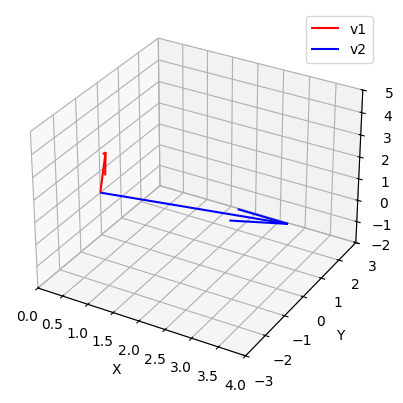

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, v1_x, v1_y, v1_z, color='r', label='v1')
ax.quiver(0, 0, 0, v2_x, v2_y, v2_z, color='b', label='v2')

print(int(max(v1_x[0], v2_x[0])+1))

ax.set_xlim(int(min(v1_x[0], v2_x[0])-1), int(max(v1_x[0], v2_x[0])+1))
ax.set_ylim(int(min(v1_y[0], v2_y[0])-1), int(max(v1_y[0], v2_y[0])+1))
ax.set_zlim(int(min(v1_z[0], v2_z[0])-1), int(max(v1_z[0], v2_z[0])+1))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

# 그래프 표시
plt.show()

### 3. Dot Product, Cross Product

In [105]:
# dot product, cross product
dotted = v1.dot(v2)
crossed = v1.cross(v2)

dotted, crossed

(-5, (-6)*A.i + 13*A.j + 8*A.k)

### 4. Vectorize Words

In [106]:
from dataclasses import dataclass

apple = "사과"
banana = "바나나"
red = "빨강"
yellow = "노랑"

@dataclass
class Word:
    name: str
    vector: list

In [107]:
# from openai import OpenAI
# import pandas as pd
# import os


# client = OpenAI(api_key = os.getenv("SDKIM_OPENAI_API_KEY"))

# apple_emb = client.embeddings.create(input=apple, model="text-embedding-3-small").data[0].embedding
# banana_emb = client.embeddings.create(input=banana, model="text-embedding-3-small").data[0].embedding
# red_emb = client.embeddings.create(input=red, model="text-embedding-3-small").data[0].embedding
# yellow_emb = client.embeddings.create(input=yellow, model="text-embedding-3-small").data[0].embedding

In [108]:
# apple = Word(name="사과", vector=apple_emb)
# banana = Word(name="바나나", vector=banana_emb)
# red = Word(name="빨강", vector=red_emb)
# yellow = Word(name="노랑", vector=yellow_emb)

In [109]:
# import json
# apple_json = apple.__dict__
# banana_json = banana.__dict__
# red_json = red.__dict__
# yellow_json = yellow.__dict__

# words = json.dumps([apple_json, banana_json, red_json, yellow_json], ensure_ascii=False, indent=4)

# with open("word_json.json", "w") as f:
#     f.write(words)

In [110]:
import json

with open("word_json.json", "r") as f:
    file = json.load(f)

In [111]:
apple_json = file[0]
banana_json = file[1]
red_json = file[2]
yellow_json = file[3]

In [112]:
apple = Word(name=apple_json["name"], vector=apple_json["vector"])
banana = Word(name=banana_json["name"], vector=banana_json["vector"])
red = Word(name=red_json["name"], vector=red_json["vector"])
yellow = Word(name=yellow_json["name"], vector=yellow_json["vector"])

In [113]:
from sklearn.manifold import TSNE
import numpy as np

def get_3d_embeddings(vectors):

    vectors_np = []
    for v in vectors:
        v = np.array(v)
        vectors_np.append(v)

    vectors_np = np.array(vectors_np)

    tsne = TSNE(n_components=3, random_state=0, perplexity=2)
    embeddings_3d = tsne.fit_transform(vectors_np)

    return embeddings_3d

In [114]:
embeddings = get_3d_embeddings([apple.vector, banana.vector, red.vector, yellow.vector])

embeddings

array([[  -7.482784,   21.2442  ,  120.34845 ],
       [ 127.71323 , -524.69727 , -777.498   ],
       [-245.90302 , 1231.5104  , 2131.801   ],
       [  37.14307 , -210.83789 , -398.1785  ]], dtype=float32)

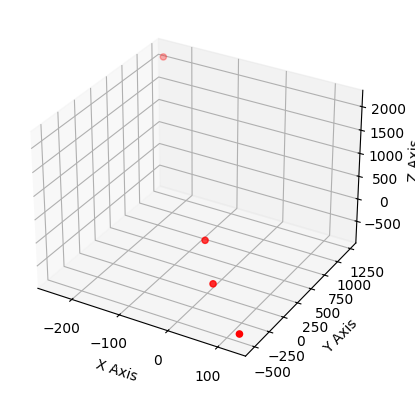

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c='r', marker='o')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 그래프 표시
plt.show()